# ML Basics I: Redes neuronas artificiales

![](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/timeline.png)


## 1943. Modelo lógico para una neurona de McCulloch-Pitts 

![](https://images.computerhistory.org/timeline/timeline_computers_1939.hewlettpackard.jpg)

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/ANN.png)

Compuertas lógicas: 

![](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/compuertas.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def fn_activacion(mensaje, pesos, umbral):    
    x = mensaje
    sum_ = np.inner(pesos, x)

    if sum_ >= umbral:
        return 1
    else:
        return 0

def neurona(senal_entrada, etiquetas_entrada, 
            etiqueta_salida, pesos = [1,1], umbral = 1):
    pesos = np.array(pesos)
    umbral = umbral
        
    tabla_logica = pd.DataFrame(senal_entrada, columns = etiquetas_entrada)
    senal_salida = []
    
    for senal in senal_entrada:
        signal = fn_activacion(senal, pesos, umbral)
        senal_salida.append(signal)
            
    tabla_logica[etiqueta_salida] = pd.Series(senal_salida)
    
    return tabla_logica

In [3]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
etiquetas_in = ['x1', 'x2']
etiquetas_out = 'y'

OR = neurona(entradas, etiquetas_in, etiquetas_out, pesos = [1,1], umbral = 1)

print(OR)

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1


In [4]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
etiquetas_in = ['x1', 'x2']
etiquetas_out = 'y'

NAND = neurona(entradas, etiquetas_in, etiquetas_out, pesos = [-1,-1], umbral = -1)

print(NAND)

   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0


In [5]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
etiquetas_in = ['x1', 'x2']
etiquetas_out = 'y'

NOR = neurona(entradas, etiquetas_in, etiquetas_out, pesos = [-1,-1], umbral = 0)

print(NOR)

   x1  x2  y
0   0   0  1
1   0   1  0
2   1   0  0
3   1   1  0


### -> Ejercicio 1 (opcional)

Encuentra la configuración correcta del modelo neuronal de McCulloch-Pitts para las copuertas lógicas XNOR y AND

# 1957 Perceptron

![](https://news.cornell.edu/sites/default/files/styles/story_thumbnail_xlarge/public/2019-09/0925_rosenblatt_main.jpg?itok=SE0aS7ds)

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/perceptron_rule.png)

In [6]:
class Perceptron:
    def __init__(self, alpha = 0.01, umbral = 0, intercepto = True, epocas = 10):
        self.alpha = alpha
        self.umbral = umbral
        self.intercepto = intercepto
        self.epocas = epocas
        
        
    def aprender(self, X, y):
        """
        Algoritnmo de aprendizaje del Perceptron para aprender los pesos del clasificador.
        
        Parametros
        ----------
        X : array-like, shape = [N, m]
            Entradas de entrenamiento.
        y : array-like, shape = [N, 1]
            Etiquetas de entrenamiento.
        """
        
        N = X.shape[0]
        
        if self.intercepto:
            X = np.concatenate((np.ones([N,1]), X), axis = 1)
            
        m = X.shape[1]
        
        self.w_ = self.inicializar(m)
        self.errores_ = []
        
        for _ in range(self.epocas):
            errores = 0
            
            for x_n, y_n in zip(X,y):
                x_n = x_n.reshape((m, 1))
                update = self.alpha*(y_n - self.predecir(x_n))*x_n
                self.w_ += update
                errores += np.sum(update != 0.0)/(m)
                
            self.errores_.append(errores)
            
   
    
    def inicializar(self, m):
        """Inicializar vector con pesos igual a cero"""
        return np.zeros([m, 1])
    
    
    def predecir(self, x):
            """Función de activación Heaviside"""
            return np.where(np.dot(self.w_.T, x) >= self.umbral, 1, -1)

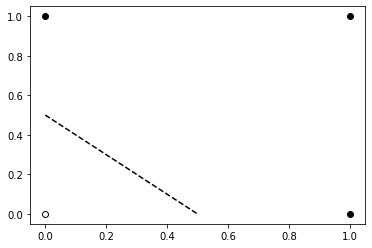

In [7]:
OR = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,1]])

OR_pcptrn = Perceptron(alpha=0.1, umbral=0.5, intercepto = False, epocas=10)
OR_pcptrn.aprender(X = OR[:,0:2], y = OR[:,2:])

# OR Gate Decision Boundery
plt.scatter(OR[1:,0], OR[1:,1], color='black', marker = 'o')
plt.scatter(OR[0,0], OR[0,1], color='white', edgecolor = 'black', marker='o')

xx = np.linspace(0.0, 0.5)
w = OR_pcptrn.w_
a = 0.5
b = -w[0]/w[1]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()


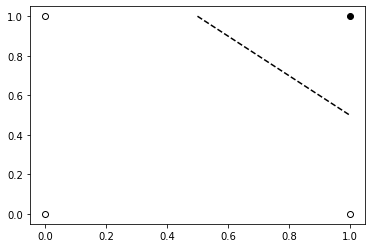

In [8]:
AND = np.array([[0,0,0], [0,1,0], [1,0,0], [1,1,1]])

AND_pcptrn = Perceptron(alpha=0.1, umbral=1.5, intercepto = False, epocas=10)
AND_pcptrn.aprender(X = AND[:,0:2], y = AND[:,2:])

# OR Gate Decision Boundery
plt.scatter(AND[3,0], AND[3,1], color='black', marker = 'o')
plt.scatter(AND[:3,0], AND[:3,1], color='white', edgecolor = 'black', marker='o')

xx = np.linspace(0.5, 1)
w = AND_pcptrn.w_
a = 1.5
b = -w[0]/w[1]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

## Clasificación de objetos astronómicos del SDSS DR14

In [9]:
data_iris = pd.read_csv('https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/data/iris/iris.data')
data_iris.head()

,#sepallength,sepalwidth,petallength,petalwidth
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
sns.scatterplot(x="sepallength", y="petallength", data=data_iris, hue="class")

ValueError: Could not interpret value `sepallength` for parameter `x`

In [ ]:
y = data_dr14.iloc[:, 3].values
#GALAXY, QSO, STAR
y = np.where(y == 'STAR', -1, 1)
X = data_dr14.iloc[:, [0,2]].values

y = y[:500]
X = X[:500, :]
# data visualisation
color= ['red' if l == -1 else 'green' for l in y]
plt.scatter(X[:, 0], np.log(X[:, 1]), marker='o', color=color)
# plt.ylabel(y)

plt.xlabel('RA')
# plt.ylabel('DEC')
plt.ylabel('redshift')

plt.show()
np.shape(X), np.shape(y)

In [ ]:
# initialise parameters for the Perceptron
perceptron = Perceptron(alpha = 1e-5, epocas = 100)
# learn weights
perceptron.aprender(X,y)

In [ ]:
# plot decision boundary
# data visualisation
color= ['red' if l == -1 else 'green' for l in y]

plt.scatter(X[:, 0], np.log(X[:, 1]), marker='o', color=color)
# plt.ylabel(y)
plt.xlabel('RA')
# plt.ylabel('DEC')
plt.ylabel('redshift')

xx = np.linspace(min(X[:,0]), max(X[:,0]))
w = perceptron.w_

a = -w[0]/w[2]
b = -w[1]/w[2]

yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

### Analizar cuántos aciertos tiene el modelo

In [ ]:
plt.plot(range(1, len(perceptron.errores_) + 1), perceptron.errores_,marker='o')
plt.xlabel('Epocas')
plt.ylabel('Número de clasificaciones erróneas')
plt.show()

### -> Ejercicio 2 (opcional)

Utiliza otro conjunto de datos que permita clasificación binaria y entrena al perceptrón para clasificar. 

## Referencias

- McCulloch, W. S., & Pitts, W. (1943). A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4), 115-133. 

- Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.

- https://jontysinai.github.io/jekyll/update/2017/09/24/the-mcp-neuron.html

- https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html 